# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\jbro0\OneDrive\Desktop\College_Stuff\Data Science 1\Project\datascience1project\data\scopus_citations\data.csv')

In [3]:
def process_text(s):
    ## PROCESS TEXT
    s = s.lower() # Cast to lowercase
    s = s.translate(str.maketrans('', '', string.punctuation)) # Remove punctutation
    #word_list = list(s.split(' ')) # Cast to list
    return s


In [4]:
df['Full_Text'] = df['Title']+df['Abstract'] 
df['Processed_Text'] = df['Full_Text'].apply(process_text)

In [5]:
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,Full_Text,Processed_Text
0,"F., Chen, Feifei; Q.L., Wu, Qiwei Luna; N., Yu...","Chen, Feifei (57329083000); Wu, Qiwei Luna (57...",57329083000; 57559547600; 36672237700,Building or unbuilding trust? A reflection on ...,2023,NaN,NaN,NaN,NaN,607,...,"During public health crises, public trust is e...",Corporate Social Responsibility; Covid-19; Eth...,NaN,Book chapter,Final,NaN,Scopus,2-s2.0-85182866067,Building or unbuilding trust? A reflection on ...,building or unbuilding trust a reflection on g...
1,"S., Vijaykumar, Santosh; Y., Jin, Yan; A., Ses...","Vijaykumar, Santosh (26540561000); Jin, Yan (2...",26540561000; 27169729500; 56613374900,Understanding contemporary infodemics through ...,2023,NaN,NaN,NaN,NaN,453,...,Infectious disease outbreaks such as the COVID...,Artificial Intelligence (ai); Crisis Communica...,NaN,Book chapter,Final,NaN,Scopus,2-s2.0-85182838880,Understanding contemporary infodemics through ...,understanding contemporary infodemics through ...
2,"A.R., Diers-Lawson, Audra R.","Diers-Lawson, Audra R. (55789359700)",55789359700,It's complicated . . .: Exploring vaccination ...,2023,NaN,NaN,NaN,NaN,551,...,"In 2019, the United Kingdom (UK) lost its ""mea...",Attitudes; Covid-19; Information Consumption; ...,NaN,Book chapter,Final,NaN,Scopus,2-s2.0-85182831975,It's complicated . . .: Exploring vaccination ...,its complicated exploring vaccination attit...
3,"A., Fernández, Angel; L., Andaluz Antón, Lucía...","Fernández, Angel (57955386200); Andaluz Antón,...",57955386200; 57218547214; 57206779844; 5721407...,"MISINFORMATION, VISUAL MANIPULATION AND REPRES...",2023,Arte y Sociedad (Aranjuez),2023,24,NaN,15,...,This work analyzes the role of images as a veh...,Image; Misinformation; Photography; Twitter; X,NaN,Article,Final,NaN,Scopus,2-s2.0-85182175356,"MISINFORMATION, VISUAL MANIPULATION AND REPRES...",misinformation visual manipulation and represe...
4,"O.O., Olu-Abiodun, Oluwatosin O.; J.O., Sodimu...","Olu-Abiodun, Oluwatosin O. (56338456500); Sodi...",56338456500; 57394710900; 57213165409; 5768258...,Perception of COVID-19 vaccine among people li...,2023,Babcock University Medical Journal,6,2,NaN,229,...,Objective: This study was carried out to deter...,Hiv; Perception; Uptake; Vaccine; Vaccine-rela...,NaN,Article,Final,NaN,Scopus,2-s2.0-85181484383,Perception of COVID-19 vaccine among people li...,perception of covid19 vaccine among people liv...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') 
X = vectorizer.fit_transform(df['Processed_Text'])

In [6]:
# Save as dataframe
tfidf_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=[i for i in range(len(df))]
)

In [7]:
df['Pre-2016'] = df['Year'] <= 2016 # Turn into binary classifier
Y = df['Pre-2016']

In [8]:
tfidf_df.head()

,00,000,0000,000001,00001,000012,00003,00005,0001,00010227,...,算法purposesignificance,缓解与挑战with,网络信息生态系统中的虚假信息,臺灣選舉為ever,行动型国家死亡原因分析工具在海南省,貼文內容與超連結分析in,資訊與社會,青年母亲连续怀孕探索性研究aim,ﬁve,ﬂooding
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pre and Post 2016 binary classifier - near 100% accurate on training data

In [64]:
classifier = LogisticRegression(penalty=None)
classifier.fit(X,Y)
predicted_on_training = classifier.predict(X)

print(f"""The training accuracy is {np.mean(predicted_on_training == Y):.2%}.
The training precision is {np.mean(Y[predicted_on_training == 1]):.2%}.
The training recall is {np.mean(predicted_on_training[Y == 1]):.2%}.""")
print(f"""The baseline of just guessing every paper is from before 2016 yields an accuracy of {np.mean(Y):.2%}""")

The training accuracy is 99.86%.
The training precision is 99.58%.
The training recall is 99.02%.
The baseline of just guessing every paper is from before 2016 yields an accuracy of 9.71%


# Pre and Post 2016 binary classifier on K folds

In [89]:
# This all follows the scikit learn documentation
from sklearn.model_selection import KFold 

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Set up 4 k-folds since ~10% of data is pre 2016, want to make sure we're not getting only False/True training sets

logistic_regression_model = LogisticRegression(penalty=None) # Set up model

i=0
model_accuracies = []
model_precisions = []
model_recalls = []

for train,test in kf.split(X): 

    # Split data into training and testing groups
    x_train = X[train]
    Y_list = list(Y) # Deal with silly data structure stuff
    y_train = [Y_list[i] for i in train]

    x_test = X[test]
    y_test = pd.Series([Y_list[j] for j in test])

    # Fit model on training data
    fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

    # Predict testing data
    #predicted_on_training = fitted_model.predict(x_test)

    # Predict testing data
    predicted_on_training_prob = fitted_model.predict_proba(x_test) 

    predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

    model_accuracies.append(np.mean(predicted_on_training == y_test))

    model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

    model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

    # Report
    print(f"""The training accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
    print(f"""The training precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
    print(f"""The training recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
    i+=1

models_df = pd.DataFrame({'Model':np.arange(5), 'Accuracy': model_accuracies, 'Precision':model_precisions, 'Recall':model_recalls})
print(models_df)
models_df = models_df.melt(id_vars='Model', var_name='Measure', value_name='Value') # Restructure df for plotting

The training accuracy for trial 0 is 92.61%.
The training precision for trial 0 is 64.26%.
The training recall for trial 0 is 62.33%.
The training accuracy for trial 1 is 92.75%.
The training precision for trial 1 is 60.81%.
The training recall for trial 1 is 61.03%.
The training accuracy for trial 2 is 93.40%.
The training precision for trial 2 is 64.55%.
The training recall for trial 2 is 63.60%.
The training accuracy for trial 3 is 92.58%.
The training precision for trial 3 is 65.37%.
The training recall for trial 3 is 52.25%.
The training accuracy for trial 4 is 92.51%.
The training precision for trial 4 is 63.77%.
The training recall for trial 4 is 57.68%.
   Model  Accuracy  Precision    Recall
0      0  0.926140   0.642612  0.623333
1      1  0.927502   0.608059  0.610294
2      2  0.933969   0.645522  0.636029
3      3  0.925800   0.653680  0.522491
4      4  0.925094   0.637736  0.576792


Text(0.5, 1.0, 'Properties of classifiers')

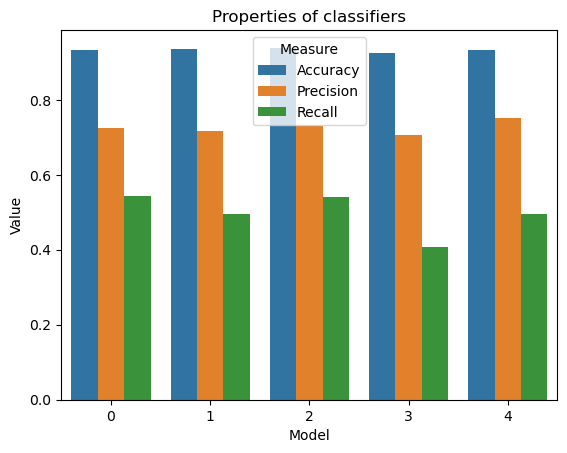

In [74]:
sns.barplot(data=models_df, x='Model', y='Value', hue='Measure')
plt.title('Properties of classifiers')

AUC for model 1 and tol=1.0 is 0.9313836239575435
AUC for model 2 and tol=1.0 is 0.9319425444596444
AUC for model 3 and tol=1.0 is 0.9442254865186885
AUC for model 4 and tol=1.0 is 0.9255056096117749
AUC for model 5 and tol=1.0 is 0.9254426275216473
AUC for model 1 and tol=0.75 is 0.9313836239575435
AUC for model 2 and tol=0.75 is 0.9319425444596444
AUC for model 3 and tol=0.75 is 0.9442254865186885
AUC for model 4 and tol=0.75 is 0.9255056096117749
AUC for model 5 and tol=0.75 is 0.9254426275216473
AUC for model 1 and tol=0.5 is 0.9313836239575435
AUC for model 2 and tol=0.5 is 0.9319425444596444
AUC for model 3 and tol=0.5 is 0.9442254865186885
AUC for model 4 and tol=0.5 is 0.9255056096117749
AUC for model 5 and tol=0.5 is 0.9254426275216473
AUC for model 1 and tol=0.25 is 0.9313836239575435
AUC for model 2 and tol=0.25 is 0.9319425444596444
AUC for model 3 and tol=0.25 is 0.9442254865186885
AUC for model 4 and tol=0.25 is 0.9255056096117749
AUC for model 5 and tol=0.25 is 0.9254426

Text(0, 0.5, 'True positive rate')

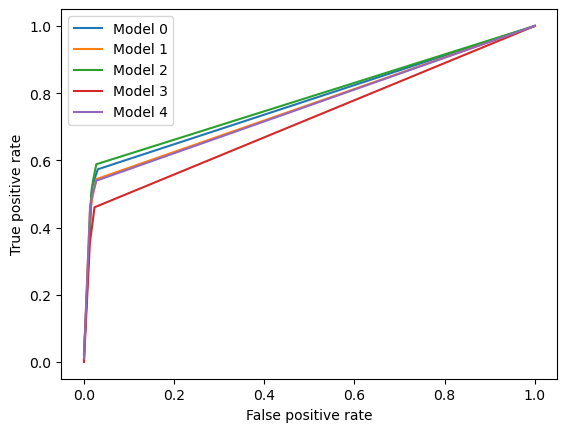

In [85]:
# Get important rates 
from sklearn.metrics import roc_auc_score

def get_rates(y_test, predicted_on_training):
    true_pos = 0
    true_neg = 0
    false_neg = 0
    false_pos = 0

    # Check all cases
    for i in range(len(y_test)):
        if predicted_on_training[i]==y_test[i]==1:
            true_pos +=1
        elif predicted_on_training[i]==y_test[i]==0:
            true_neg +=1
        elif y_test[i]==1 and predicted_on_training[i]==0:
            false_neg += 1
        elif y_test[i]==0 and predicted_on_training[i]==1:
            false_pos += 1

    sensitivity = true_pos / (true_pos + false_neg)
    specificity = true_neg / (true_neg + false_pos)

    false_pos_rate = 1 - specificity
    true_pos_rate = sensitivity

    return  (false_pos_rate, true_pos_rate) # Return rates 

def tol_test(tol,j):
    curves = np.zeros(5).astype(tuple)
    i=0
    for train,test in kf.split(X): 

        # Split data into training and testing groups
        x_train = X[train]
        Y_list = list(Y) # Deal with silly data structure stuff
        y_train = [Y_list[i] for i in train]

        x_test = X[test]
        y_test = pd.Series([Y_list[j] for j in test])

        # Fit model on training data
        fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

        # Predict testing data
        predicted_on_training_prob = fitted_model.predict_proba(x_test) 

        predicted_on_training = (predicted_on_training_prob[:,1] >= tol) # Check if probability of classifying as 1 is greater than toleranec

        rates = get_rates(y_test, predicted_on_training)
        curves[i] = [rates[0], rates[1]]

        auc = roc_auc_score(y_test, predicted_on_training_prob[:,1])

        aucs[i,j] = auc

        i+=1

        print(f'AUC for model {i} and tol={tol} is {auc}')


    return curves

tols = np.linspace(1,0,5) # Start with 10, change later 
curve_plots = []

aucs = np.zeros((5,5)) # Initialize here, should be a function but I'm too lazy to rework 
j=0
for tol in tols:
    curves = tol_test(tol,j)
    curve_plots.append(curves)
    j+=1

        
# Structure is curve_plots[time][model][x or y]

import scipy as sp
curve_plots = np.array(curve_plots)
# Split along the 'model' axis (axis=1)
models = [np.array(curve_plots[:, i]) for i in range(curve_plots.shape[1])]

x_lists = []
y_lists = []

for model in models:
    arr = np.array(model.tolist(), dtype=float) # Deal with bad structure
    x_lists.append(arr[:, 0])  # all x values for model 
    y_lists.append(arr[:, 1])  # all y values for model

for i in range(len(x_lists)):
    plt.plot(x_lists[i], y_lists[i], label = f'Model {i}')

plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [86]:
aucs

array([[0.93138362, 0.93138362, 0.93138362, 0.93138362, 0.93138362],
       [0.93194254, 0.93194254, 0.93194254, 0.93194254, 0.93194254],
       [0.94422549, 0.94422549, 0.94422549, 0.94422549, 0.94422549],
       [0.92550561, 0.92550561, 0.92550561, 0.92550561, 0.92550561],
       [0.92544263, 0.92544263, 0.92544263, 0.92544263, 0.92544263]])

# Feature simplification check

In [17]:
vectorizer_simplified = TfidfVectorizer(
    #lowercase=True,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z0-9]{2,}\b',
    #ngram_range=(1,2),
    max_features=10000
)
X_simple = vectorizer_simplified.fit_transform(df['Processed_Text'])

# Save as dataframe
simple_tfidf_df = pd.DataFrame(
    X_simple.toarray(),
    columns=vectorizer_simplified.get_feature_names_out(),
    index=[i for i in range(len(df))]
)

In [11]:
simple_tfidf_df.head()

,000,00001,0001,0002,0003,001,002,003,004,005,...,zeroshot,zika,zikv,zimbabwe,zinc,zone,zones,zoom,zoonotic,zoster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
classifier = LogisticRegression(penalty=None)
classifier.fit(X_simple,Y)
predicted_on_training = classifier.predict(X_simple)

print(f"""The training accuracy is {np.mean(predicted_on_training == Y):.2%}.
The training precision is {np.mean(Y[predicted_on_training == 1]):.2%}.
The training recall is {np.mean(predicted_on_training[Y == 1]):.2%}.""")
print(f"""The baseline of just guessing every paper is from before 2016 yields an accuracy of {np.mean(Y):.2%}""")

The training accuracy is 99.95%.
The training precision is 99.72%.
The training recall is 99.79%.
The baseline of just guessing every paper is from before 2016 yields an accuracy of 9.71%


In [13]:
# This all follows the scikit learn documentation
from sklearn.model_selection import KFold 

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Set up 4 k-folds since ~10% of data is pre 2016, want to make sure we're not getting only False/True training sets

logistic_regression_model = LogisticRegression(penalty=None, class_weight='balanced') # Set up model

i=0
model_accuracies = []
model_precisions = []
model_recalls = []

for train,test in kf.split(X_simple): 

    # Split data into training and testing groups
    x_train = X_simple[train]
    Y_list = list(Y) # Deal with silly data structure stuff
    y_train = [Y_list[i] for i in train]

    x_test = X_simple[test]
    y_test = pd.Series([Y_list[j] for j in test])

    # Fit model on training data
    fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

    # Predict testing data
    #predicted_on_training = fitted_model.predict(x_test)

    # Predict testing data
    predicted_on_training_prob = fitted_model.predict_proba(x_test) 

    predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

    model_accuracies.append(np.mean(predicted_on_training == y_test))

    model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

    model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

    # Report
    print(f"""The training accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
    print(f"""The training precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
    print(f"""The training recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
    i+=1

models_df = pd.DataFrame({'Model':np.arange(5), 'Accuracy': model_accuracies, 'Precision':model_precisions, 'Recall':model_recalls})
print(models_df)
models_df = models_df.melt(id_vars='Model', var_name='Measure', value_name='Value') # Restructure df for plotting

The training accuracy for trial 0 is 92.89%.
The training precision for trial 0 is 68.88%.
The training recall for trial 0 is 55.33%.
The training accuracy for trial 1 is 92.24%.
The training precision for trial 1 is 58.66%.
The training recall for trial 1 is 54.78%.
The training accuracy for trial 2 is 93.43%.
The training precision for trial 2 is 65.25%.
The training recall for trial 2 is 62.13%.
The training accuracy for trial 3 is 91.70%.
The training precision for trial 3 is 59.34%.
The training recall for trial 3 is 49.48%.
The training accuracy for trial 4 is 92.68%.
The training precision for trial 4 is 68.93%.
The training recall for trial 4 is 48.46%.
   Model  Accuracy  Precision    Recall
0      0  0.928863   0.688797  0.553333
1      1  0.922396   0.586614  0.547794
2      2  0.934309   0.652510  0.621324
3      3  0.916950   0.593361  0.494810
4      4  0.926796   0.689320  0.484642


In [122]:
probs = fitted_model.predict_proba(x_test)[:, 1]
print("Unique probs:", np.unique(np.round(probs, 2))[:10])
print("Min/max probs:", probs.min(), probs.max())

for t in [0.1, 0.3, 0.5]:
    preds = (probs >= t).astype(int)
    print(f"Threshold={t:.1f}, positives={preds.sum()}")

Unique probs: [0.   0.01 0.02 0.03 0.04 0.05 0.07 0.08 0.09 0.1 ]
Min/max probs: 4.885469974409082e-255 1.0
Threshold=0.1, positives=206
Threshold=0.3, positives=201
Threshold=0.5, positives=198


# 2020 onwards removed

In [18]:
no_covid_df = df[df['Year']<=2020]

X_simple2 = vectorizer_simplified.fit_transform(no_covid_df['Processed_Text']) # 2 for no covid, will clean later

# Save as dataframe
simple_tfidf_df2 = pd.DataFrame(
    X_simple.toarray(),
    columns=vectorizer_simplified.get_feature_names_out(),
    index=[i for i in range(len(df))]
)

Y2 = no_covid_df['Pre-2016']

classifier = LogisticRegression(penalty=None)
classifier.fit(X_simple2,Y2)
predicted_on_training = classifier.predict(X_simple2)

print(f"""The training accuracy is {np.mean(predicted_on_training == Y2):.2%}.
The training precision is {np.mean(Y2[predicted_on_training == 1]):.2%}.
The training recall is {np.mean(predicted_on_training[Y2 == 1]):.2%}.""")
print(f"""The baseline of just guessing every paper is from before 2016 yields an accuracy of {np.mean(Y2):.2%}""")


The training accuracy is 99.92%.
The training precision is 99.86%.
The training recall is 99.86%.
The baseline of just guessing every paper is from before 2016 yields an accuracy of 28.66%


In [16]:
# This all follows the scikit learn documentation
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix # WHAT!

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Set up 4 k-folds since ~10% of data is pre 2016, want to make sure we're not getting only False/True training sets

logistic_regression_model = LogisticRegression(penalty=None, class_weight='balanced') # Set up model

i=0
model_accuracies = []
model_precisions = []
model_recalls = []
model_npvs = []

for train,test in kf.split(X_simple2): 

    # Split data into training and testing groups
    x_train = X_simple2[train]
    Y_list = list(Y2) # Deal with silly data structure stuff
    y_train = [Y_list[i] for i in train]

    x_test = X_simple2[test]
    y_test = pd.Series([Y_list[j] for j in test])

    # Fit model on training data
    fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

    # Predict testing data
    #predicted_on_training = fitted_model.predict(x_test)

    # Predict testing data
    predicted_on_training_prob = fitted_model.predict_proba(x_test) 

    predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

    model_accuracies.append(np.mean(predicted_on_training == y_test))

    model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

    model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_on_training).ravel()

    # Compute NPV
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan

    model_npvs.append(npv)


    # Report
    print(f"""The accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
    print(f"""The precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
    print(f"""The recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
    print(f"""The npv for trial {i} is {npv:.2%}.""")

    i+=1

#models_df = pd.DataFrame({'Model':np.arange(5), 'Accuracy': model_accuracies, 'Precision':model_precisions, 'Recall':model_recalls})
#print(models_df)
#models_df = models_df.melt(id_vars='Model', var_name='Measure', value_name='Value') # Restructure df for plotting

The accuracy for trial 0 is 80.52%.
The precision for trial 0 is 68.75%.
The recall for trial 0 is 60.69%.
The npv for trial 0 is 84.59%.
The accuracy for trial 1 is 81.51%.
The precision for trial 1 is 64.81%.
The recall for trial 1 is 66.29%.
The npv for trial 1 is 87.72%.
The accuracy for trial 2 is 80.30%.
The precision for trial 2 is 66.45%.
The recall for trial 2 is 68.24%.
The npv for trial 2 is 86.40%.
The accuracy for trial 3 is 79.20%.
The precision for trial 3 is 66.67%.
The recall for trial 3 is 62.46%.
The npv for trial 3 is 84.15%.
The accuracy for trial 4 is 79.10%.
The precision for trial 4 is 61.75%.
The recall for trial 4 is 64.00%.
The npv for trial 4 is 86.06%.


# Check for 2017

In [26]:
no_covid_df['Pre-2017'] = no_covid_df['Year'] <=2017

X_simple2 = vectorizer_simplified.fit_transform(no_covid_df['Processed_Text']) # 2 for no covid, will clean later

# Save as dataframe
simple_tfidf_df2 = pd.DataFrame(
    X_simple.toarray(),
    columns=vectorizer_simplified.get_feature_names_out(),
    index=[i for i in range(len(df))]
)

Y2 = no_covid_df['Pre-2017']

classifier = LogisticRegression(penalty=None)
classifier.fit(X_simple2,Y2)
predicted_on_training = classifier.predict(X_simple2)

print(f"""The training accuracy is {np.mean(predicted_on_training == Y2):.2%}.
The training precision is {np.mean(Y2[predicted_on_training == 1]):.2%}.
The training recall is {np.mean(predicted_on_training[Y2 == 1]):.2%}.""")
print(f"""The baseline of just guessing every paper is from before 2016 yields an accuracy of {np.mean(Y2):.2%}""")



C:\Users\jbro0\AppData\Local\Temp\ipykernel_26236\1433195220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_covid_df['Pre-2017'] = no_covid_df['Year'] <=2017


The training accuracy is 99.88%.
The training precision is 99.78%.
The training recall is 99.89%.
The baseline of just guessing every paper is from before 2016 yields an accuracy of 36.78%


In [27]:
# This all follows the scikit learn documentation
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix # WHAT!

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Set up 4 k-folds since ~10% of data is pre 2016, want to make sure we're not getting only False/True training sets

logistic_regression_model = LogisticRegression(penalty=None, class_weight='balanced') # Set up model

i=0
model_accuracies = []
model_precisions = []
model_recalls = []
model_npvs = []

for train,test in kf.split(X_simple2): 

    # Split data into training and testing groups
    x_train = X_simple2[train]
    Y_list = list(Y2) # Deal with silly data structure stuff
    y_train = [Y_list[i] for i in train]

    x_test = X_simple2[test]
    y_test = pd.Series([Y_list[j] for j in test])

    # Fit model on training data
    fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

    # Predict testing data
    #predicted_on_training = fitted_model.predict(x_test)

    # Predict testing data
    predicted_on_training_prob = fitted_model.predict_proba(x_test) 

    predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

    model_accuracies.append(np.mean(predicted_on_training == y_test))

    model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

    model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_on_training).ravel()

    # Compute NPV
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan

    model_npvs.append(npv)


    # Report
    print(f"""The accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
    print(f"""The precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
    print(f"""The recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
    print(f"""The npv for trial {i} is {npv:.2%}.""")

    i+=1

#models_df = pd.DataFrame({'Model':np.arange(5), 'Accuracy': model_accuracies, 'Precision':model_precisions, 'Recall':model_recalls})
#print(models_df)
#models_df = models_df.melt(id_vars='Model', var_name='Measure', value_name='Value') # Restructure df for plotting

The accuracy for trial 0 is 82.13%.
The precision for trial 0 is 76.71%.
The recall for trial 0 is 75.07%.
The npv for trial 0 is 85.26%.
The accuracy for trial 1 is 80.80%.
The precision for trial 1 is 70.24%.
The recall for trial 1 is 76.61%.
The npv for trial 1 is 87.14%.
The accuracy for trial 2 is 80.30%.
The precision for trial 2 is 71.83%.
The recall for trial 2 is 76.90%.
The npv for trial 2 is 85.86%.
The accuracy for trial 3 is 78.19%.
The precision for trial 3 is 71.97%.
The recall for trial 3 is 70.26%.
The npv for trial 3 is 81.89%.
The accuracy for trial 4 is 78.39%.
The precision for trial 4 is 67.67%.
The recall for trial 4 is 79.29%.
The npv for trial 4 is 86.55%.


# As function for Ale

In [45]:
vectorizer_simplified = TfidfVectorizer(
    #lowercase=True,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z0-9]{2,}\b',
    #ngram_range=(1,2),
    max_features=10000
)

def run_comp_training(year, exclude_covid=True):
    
    if exclude_covid==True:
        no_covid_df[f'Pre-{year}'] = no_covid_df['Year'] <= year
        Y = no_covid_df[f'Pre-{year}'].reset_index(drop=True)
        X = vectorizer_simplified.fit_transform(no_covid_df['Processed_Text']) # Again this column is only for training.

    else:
        df[f'Pre-{year}'] = df['Year'] <= year
        Y = df[f'Pre-{year}']
        X = vectorizer_simplified.fit_transform(df['Processed_Text']) # Again this column is only for training.

    X = X.toarray()
    # Save as dataframe, This is for training only!!!
    simple_tfidf_df2 = pd.DataFrame(
        X,
        columns=vectorizer_simplified.get_feature_names_out(),
        index=[i for i in range(len(X))]
    )

    classifier = LogisticRegression(penalty=None)
    classifier.fit(X,Y)
    predicted_on_training = pd.Series(classifier.predict(X))

    print(f"""The training accuracy is {np.mean(predicted_on_training == Y):.2%}.
    The training precision is {np.mean(Y[predicted_on_training == 1]):.2%}.
    The training recall is {np.mean(predicted_on_training[Y == 1]):.2%}.""")
    print(f"""The baseline of just guessing every paper is from before {year} yields an accuracy of {np.mean(Y):.2%}""")


In [57]:
def run_comp_kfold(year, exclude_covid=True):

    kf = KFold(n_splits=5, shuffle=True, random_state=42) 

    logistic_regression_model = LogisticRegression(penalty=None) # Set up model

    i=0
    model_accuracies = []
    model_precisions = []
    model_recalls = []
    model_npvs = []

    if exclude_covid==True:
        df = no_covid_df
    else:
        df = df

    X = df['Processed_Text'].reset_index(drop=True)
    Y = df[f'Pre-{year}'].reset_index(drop=True)


    for train,test in kf.split(X): 

        # Split data into training and testing groups
        x_train = X[train]
        Y_list = list(Y) # Deal with silly data structure stuff
        y_train = [Y_list[i] for i in train]

        x_test = X[test]
        y_test = pd.Series([Y_list[j] for j in test])

        # Do TF-IDF magic
        x_train = vectorizer_simplified.fit_transform(x_train)
        x_test = vectorizer_simplified.transform(x_test)

        # Fit model on training data
        fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

        # Predict testing data
        #predicted_on_training = fitted_model.predict(x_test)

        # Predict testing data
        predicted_on_training_prob = fitted_model.predict_proba(x_test) 

        predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

        model_accuracies.append(np.mean(predicted_on_training == y_test))

        model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

        model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, predicted_on_training).ravel()

        # Compute NPV
        npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan

        model_npvs.append(npv)


        # Report
        print(f"""The accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
        print(f"""The precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
        print(f"""The recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
        print(f"""The npv for trial {i} is {npv:.2%}.""")

        i+=1
run_comp_kfold(2017)

The accuracy for trial 0 is 82.13%.
The precision for trial 0 is 77.31%.
The recall for trial 0 is 73.99%.
The npv for trial 0 is 84.82%.
The accuracy for trial 1 is 81.51%.
The precision for trial 1 is 71.58%.
The recall for trial 1 is 76.61%.
The npv for trial 1 is 87.28%.
The accuracy for trial 2 is 78.59%.
The precision for trial 2 is 67.82%.
The recall for trial 2 is 80.16%.
The npv for trial 2 is 86.96%.
The accuracy for trial 3 is 77.29%.
The precision for trial 3 is 68.97%.
The recall for trial 3 is 73.68%.
The npv for trial 3 is 83.02%.
The accuracy for trial 4 is 79.10%.
The precision for trial 4 is 69.44%.
The recall for trial 4 is 77.38%.
The npv for trial 4 is 85.84%.


# Test outside function for 2017

In [54]:
# This all follows the scikit learn documentation
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix # WHAT!

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Set up 4 k-folds since ~10% of data is pre 2016, want to make sure we're not getting only False/True training sets

logistic_regression_model = LogisticRegression(penalty=None, class_weight='balanced') # Set up model

i=0
model_accuracies = []
model_precisions = []
model_recalls = []
model_npvs = []

#no_covid_df = no_covid_df.reset_index()

for train,test in kf.split(no_covid_df['Processed_Text']): 

    # Split data into training and testing groups
    x_train = no_covid_df['Processed_Text'][train]
    Y_list = list(no_covid_df['Pre-2017']) # Deal with silly data structure stuff
    y_train = [Y_list[i] for i in train]

    x_test = no_covid_df['Processed_Text'][test]
    y_test = pd.Series([Y_list[j] for j in test])

    x_train = vectorizer_simplified.fit_transform(x_train)
    x_test = vectorizer_simplified.transform(x_test)

    # Fit model on training data
    fitted_model = logistic_regression_model.fit(x_train, y_train) # fit model 

    # Predict testing data
    #predicted_on_training = fitted_model.predict(x_test)

    # Predict testing data
    predicted_on_training_prob = fitted_model.predict_proba(x_test) 

    predicted_on_training = (predicted_on_training_prob[:,1] >= 0.1) # Check if probability of classifying as 1 is greater than toleranec

    model_accuracies.append(np.mean(predicted_on_training == y_test))

    model_precisions.append(np.mean(y_test[predicted_on_training == 1]))

    model_recalls.append(np.mean(predicted_on_training[y_test == 1]))

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_on_training).ravel()

    # Compute NPV
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan

    model_npvs.append(npv)


    # Report
    print(f"""The accuracy for trial {i} is {np.mean(predicted_on_training == y_test):.2%}.""")
    print(f"""The precision for trial {i} is {np.mean(y_test[predicted_on_training == 1]):.2%}.""")
    print(f"""The recall for trial {i} is {np.mean(predicted_on_training[y_test == 1]):.2%}.""")
    print(f"""The npv for trial {i} is {npv:.2%}.""")

    i+=1

#models_df = pd.DataFrame({'Model':np.arange(5), 'Accuracy': model_accuracies, 'Precision':model_precisions, 'Recall':model_recalls})
#print(models_df)
#models_df = models_df.melt(id_vars='Model', var_name='Measure', value_name='Value') # Restructure df for plotting

The accuracy for trial 0 is 81.83%.
The precision for trial 0 is 76.37%.
The recall for trial 0 is 74.53%.
The npv for trial 0 is 84.97%.
The accuracy for trial 1 is 81.61%.
The precision for trial 1 is 72.27%.
The recall for trial 1 is 75.44%.
The npv for trial 1 is 86.83%.
The accuracy for trial 2 is 79.90%.
The precision for trial 2 is 72.58%.
The recall for trial 2 is 73.37%.
The npv for trial 2 is 84.27%.
The accuracy for trial 3 is 78.09%.
The precision for trial 3 is 70.35%.
The recall for trial 3 is 73.68%.
The npv for trial 3 is 83.25%.
The accuracy for trial 4 is 78.09%.
The precision for trial 4 is 67.95%.
The recall for trial 4 is 76.84%.
The npv for trial 4 is 85.34%.


In [49]:
no_covid_df['Processed_Text']

9713     factors contributing to the uptake of childhoo...
9714     social bots in computational propaganda surfin...
9715     a review of 2020 through nature’s editorialsfr...
9716     the discourse and reality of carbon dioxide re...
9717     obstacles and considerations related to clinic...
                               ...                        
14684    combating cowitness contamination attempting t...
14685    adult credibility assessments of misinformed d...
14686    memory conformity can eyewitnesses influence e...
14687    relative  not absolute  judgments of credibili...
14688    racial variation in tubal sterilization rates ...
Name: Processed_Text, Length: 4976, dtype: object

In [58]:
no_covid_df['Year'].value_counts()

Year
2020    1785
2019     831
2018     530
2017     404
2015     296
2016     285
2014     258
2013     229
2012     206
2011     152
Name: count, dtype: int64